## 1. Data Generation(Preparation)

In [ ]:
X = list(range(10))
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

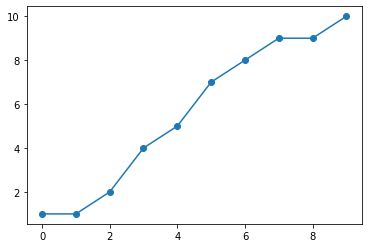

In [ ]:
#시각화
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.scatter(X, Y)

## 2. Hypothesis Define(Model Define)

f(x) = Wx 라는 모델 구현

In [ ]:
class H():

  # 처음에 모델의 파라미터(학습을 통해 최적화될 값) w를 인풋으로 받아 모델 생성
  def __init__(self, w):
    self.w = w

  # 인스턴스 x가 인풋으로 들어왔을 때 모델이 예측하는 y값 리턴
  def forward(self, x):
    return self.w * x
 
h = H(4) #f(x) = 4x
pred_y = h.forward(5)
print('value of f(5): ', pred_y)
print('value of w: ', h.w)

value of f(5):  20
value of w:  4


## 3. Cost Function Define(Loss Function Define)

회귀문제에서 비용함수 정의

In [ ]:
def cost(h, X, Y):
  error = 0
  for i in range(len(X)):
    error += (h.forward(X[i]) - Y[i])** 2
  error = error / len(X)  
  return error

h = H(4)
print('cost value when x = 4 :', cost(h, X, Y))

#조금 더 나은 버전의 코드
def better_cost(pred_y, true_y): 
  error = 0
  for i in range(len(X)):
    error += (pred_y[i] - true_y[i])**2
  error = error/len(X)
  return error

pred_y = [h.forward(X[i]) for i in range(len(X))]
print('cost value with better code structure: ', better_cost(pred_y, Y))

cost value when x = 4 : 222.2
cost value with better code structure:  222.2


### Cost Surface Visualization

다양한 w값에 따라서 cost 값이 어떻게 변화하는지 확인

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


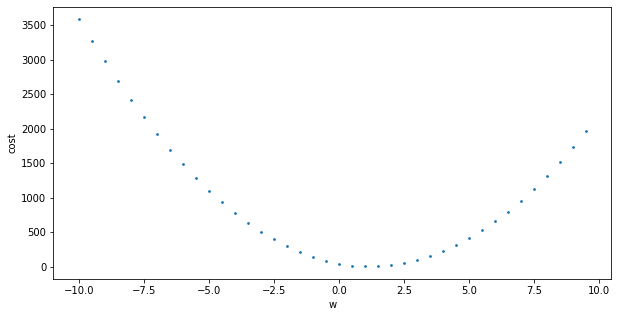

In [ ]:
list_w = []
list_c = []

for i  in range(-20, 20):
  w = i * 0.5
  h = H(w)
  c = cost(h, X, Y)

  list_w.append(w)
  list_c.append(c)

print(list_w)
print(list_c)

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

w=1.25쯤에서 cost가 최소값임을 확인

## 4. Gradient Descent Algorithm(경사 하강법)

특정 w 근방에서의 w에 대한 cost의 편미분 구하기

1. 수치해석적으로 w=4인 지점과 w=4+eps인 지점에서 cost 값을 각각 구한 뒤 두 값의 차이를 통해 그라디언트를 구하는 방식

2. cost function을 w로 편미분한 공식을 통해 바로 특정 w에서 그라디언트를 구하는 방식

** 그라디언트: 경사  
** 편미분: 다른 변수들은 상수로 고정시킨 뒤 한 변수에 대해서 미분하는 것  

### 1.Compare two approach in order to compute Gradient(Analytic, Formula)

1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


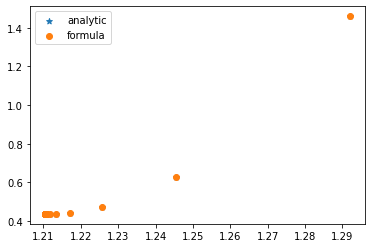

In [ ]:
#수치해석적으로 그라디언트 근사
def cal_grad(w, cost):
  h = H(w)
  cost1 = cost(h, X, Y)
  eps = 0.00001
  h = H(w+eps) #w에서 epsilon만큼 떨어진 부분에서도 cost 구함
  cost2 = cost(h, X, Y)
  dcost = cost2-cost1
  dw = eps
  grad = dcost/dw
  return grad, (cost1+cost2)*0.5

#편미분한 공식에 바로 대입하여 그라디언트 근사
def cal_grad2(w, cost):
  h = H(w)
  grad = 0
  for i in range(len(X)):
    grad += 2*(h.forward(X[i]) - Y[i]) * X[i]
  grad = grad/len(X)
  c = cost(h, X, Y)
  return grad, c

#두 방식을 이용해서 w=1.4인 지점에서 모델 각각 초기화 후 경사하강법 수행
w1= 1.4
w2 = 1.4
lr = 0.01

list_w1=[]
list_c1=[]
list_w2=[]
list_c2=[]

for i in range(100):
  grad, mean_cost = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)

  w1 -= lr * grad
  w2 -= lr * grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)

print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1, label='analytic', marker="*")
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()

거의 정확하게 같은 지점을 찍어서 그래프상 안보임

### 2. Compare Training process of Two Models Initialized from Different w value

편미분 공식 확용하여 경사하강법 진행하되 서로 다른 w지점으로 초기화되었을 때

1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


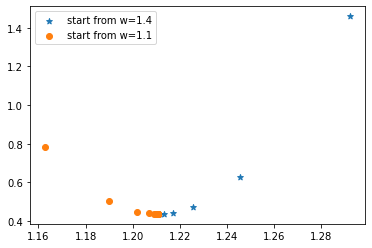

In [ ]:
w1= 1.4
w2 = 1.1
lr = 0.01

list_w1=[]
list_c1=[]
list_w2=[]
list_c2=[]

for i in range(100):
  grad, mean_cost = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)

  w1 -= lr * grad
  w2 -= lr * grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)

print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1, label='start from w=1.4', marker="*")
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()